<a href="https://colab.research.google.com/github/mrasw/Big-Data/blob/main/ets_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.3.0/spark-3.3.0-bin-hadoop2.tgz   
!tar xf spark-3.3.0-bin-hadoop2.tgz   
!pip install -q findspark

In [3]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.0-bin-hadoop2"

!export  | grep SPARK_HOME

declare -x SPARK_HOME="/content/spark-3.3.0-bin-hadoop2"


In [4]:
!pip install -U --upgrade pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pyspark

print(pyspark.__version__)

!export  | grep SPARK_HOME

3.4.0
declare -x SPARK_HOME="/content/spark-3.3.0-bin-hadoop2"


In [6]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
import pyspark.pandas as ps
import pandas as pd

/usr/local/lib/python3.9/dist-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


In [7]:
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

# spark = SparkSession.builder.appName("coba").getOrCreate()

In [8]:
data = pd.read_csv('/content/gdrive/My Drive/datasets/market-basket.csv', delimiter=";")
data.head()

<ipython-input-8-f53de8d5e363>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/gdrive/My Drive/datasets/market-basket.csv', delimiter=";")


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  object 
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [10]:
df = data.groupby('BillNo') ['Itemname']. apply (lambda x: x.reset_index (drop = True)). unstack (). reset_index ()
df.drop('BillNo',axis=1, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113
0,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART.,SET 7 BABUSHKA NESTING BOXES,GLASS STAR FROSTED T-LIGHT HOLDER,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HAND WARMER UNION JACK,HAND WARMER RED POLKA DOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ASSORTED COLOUR BIRD ORNAMENT,POPPY'S PLAYHOUSE BEDROOM,POPPY'S PLAYHOUSE KITCHEN,FELTCRAFT PRINCESS CHARLOTTE DOLL,IVORY KNITTED MUG COSY,BOX OF 6 ASSORTED COLOUR TEASPOONS,BOX OF VINTAGE JIGSAW BLOCKS,BOX OF VINTAGE ALPHABET BLOCKS,HOME BUILDING BLOCK WORD,LOVE BUILDING BLOCK WORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JAM MAKING SET WITH JARS,RED COAT RACK PARIS FASHION,YELLOW COAT RACK PARIS FASHION,BLUE COAT RACK PARIS FASHION,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BATH BUILDING BLOCK WORD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
items = (df[0].unique())
items

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'HAND WARMER UNION JACK',
       'ASSORTED COLOUR BIRD ORNAMENT', ...,
       'PINK AND WHITE CHRISTMAS TREE 120CM',
       'DOOR HANGER  MUM + DADS ROOM', 'Adjust bad debt'], dtype=object)

In [12]:
encoded_vals = []
def custom():
    for index, row in df.iterrows():
        labels = {}
        uncommons = list(set(items) - set(row))
        commons = list(set(items).intersection(row))
        for uc in uncommons:
            labels[uc] = 0
        for com in commons:
            labels[com] = 1
        encoded_vals.append(labels)
custom()
ohe_df = pd.DataFrame(encoded_vals)
print(ohe_df)

       RIBBON REEL SNOWY VILLAGE  FAMILY ALBUM WHITE PICTURE FRAME  \
0                              0                                 0   
1                              0                                 0   
2                              0                                 0   
3                              0                                 0   
4                              0                                 0   
...                          ...                               ...   
21660                          0                                 0   
21661                          0                                 0   
21662                          0                                 0   
21663                          0                                 0   
21664                          0                                 0   

       DECORATIVE WICKER HEART SMALL  HANGING MINI COLOURED BOTTLES  \
0                                  0                              0   
1                

In [13]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [14]:
freq_items = apriori(ohe_df, min_support=0.006, use_colnames=True) #, verbose=1 #min_support=0.006, 
freq_items

,support,itemsets
0,0.012462,(RIBBON REEL SNOWY VILLAGE)
1,0.016340,(FAMILY ALBUM WHITE PICTURE FRAME)
2,0.007662,(FRENCH BLUE METAL DOOR SIGN 3)
3,0.026633,(SMALL POPCORN HOLDER)
4,0.011309,(ROCKING HORSE RED CHRISTMAS)
...,...,...
13191,0.006139,"(CHARLOTTE BAG APPLES DESIGN, nan, WOODLAND CH..."
13192,0.006462,"(nan, PACK OF 72 RETROSPOT CAKE CASES, STRAWBE..."
13193,0.006508,"(nan, STRAWBERRY CHARLOTTE BAG, LUNCH BAG BLA..."
13194,0.006416,"(CHARLOTTE BAG APPLES DESIGN, nan, STRAWBERRY ..."


In [15]:
freq_items.to_excel('Export&Supportvalues.xlsx')
     

rules = association_rules(freq_items, metric="confidence", min_threshold=0.006)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(RIBBON REEL SNOWY VILLAGE),(PAPER CHAIN KIT 50'S CHRISTMAS),0.012462,0.052758,0.006324,0.507407,9.617657,0.005666,1.922973
1,(PAPER CHAIN KIT 50'S CHRISTMAS),(RIBBON REEL SNOWY VILLAGE),0.052758,0.012462,0.006324,0.119860,9.617657,0.005666,1.122023
2,(RIBBON REEL SNOWY VILLAGE),(RIBBON REEL MAKING SNOWMEN),0.012462,0.010201,0.006139,0.492593,48.289677,0.006012,1.950699
3,(RIBBON REEL MAKING SNOWMEN),(RIBBON REEL SNOWY VILLAGE),0.010201,0.012462,0.006139,0.601810,48.289677,0.006012,2.480066
4,(RIBBON REEL CHRISTMAS SOCK BAUBLE),(RIBBON REEL SNOWY VILLAGE),0.014309,0.012462,0.006370,0.445161,35.720072,0.006191,1.779864
...,...,...,...,...,...,...,...,...,...
84151,(HERB MARKER CHIVES),"(HERB MARKER BASIL, nan, HERB MARKER PARSLEY, ...",0.009508,0.007801,0.007154,0.752427,96.457603,0.007080,4.007707
84152,(HERB MARKER PARSLEY),"(HERB MARKER BASIL, nan, HERB MARKER CHIVES, H...",0.010709,0.007201,0.007154,0.668103,92.785008,0.007077,2.991292
84153,(HERB MARKER THYME),"(HERB MARKER BASIL, nan, HERB MARKER CHIVES, H...",0.010755,0.007247,0.007154,0.665236,91.798338,0.007076,2.965532
84154,(HERB MARKER ROSEMARY),"(HERB MARKER BASIL, nan, HERB MARKER CHIVES, H...",0.010801,0.007293,0.007154,0.662393,90.827518,0.007076,2.940424


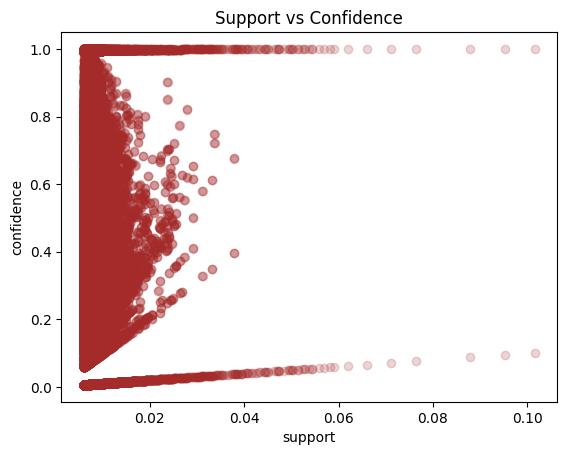

In [16]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'], rules['confidence'], alpha=0.2,color='brown')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

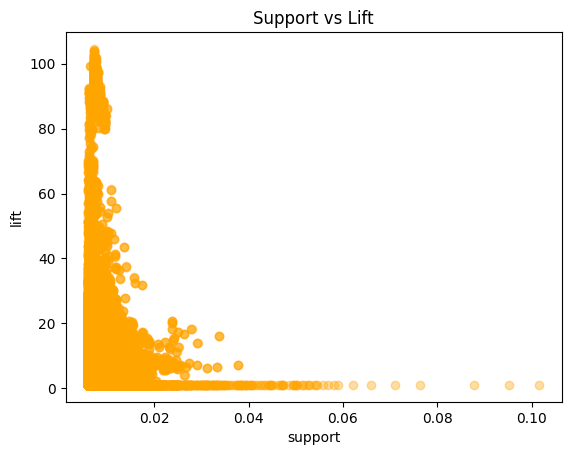

In [17]:
plt.scatter(rules['support'], rules['lift'], alpha=0.2,color='orange')
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

In [ ]:
from google.colab import files
from pyspark.sql import functions as F
from pyspark.ml.fpm import FPGrowth
import pandas

from pyspark import SparkConf
from pyspark.context import SparkContext

sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

#  #   Column      Non-Null Count   Dtype  
# ---  ------      --------------   -----  
#  0   BillNo      522064 non-null  object 
#  1   Itemname    520609 non-null  object 
#  2   Quantity    522064 non-null  int64  
#  3   Date        522064 non-null  object 
#  4   Price       522064 non-null  object 
#  5   CustomerID  388023 non-null  float64
#  6   Country     522064 non-null  object 
# spark.conf.set('spark.sql.execution.arrow.enabled', 'false')
spark.conf.set('spark.sql.pyspark.legacy.inferArrayTypeFromFirstElement.enabled', 'true')

sparkdata = sc.textFile(data)
sparkdata = spark.createDataFrame(data)
basketdata = sparkdata.dropDuplicates(['BillNo', 'Itemname']).sort('BillNo')
basketdata = basketdata.groupBy("BillNo").agg(F.collect_list("Itemname")).sort('BillNo')

In [ ]:
#Frequent Pattern Growth – FP Growth is a method of mining frequent itemsets
fpGrowth = FPGrowth(itemsCol="collect_list(Itemname)", minSupport=0.006, minConfidence=0.006) 
model = fpGrowth.fit(basketdata)

# Display frequent itemsets.
model.freqItemsets.show()
items = model.freqItemsets
# Display generated association rules.
model.associationRules.show()
rules = model.associationRules
# transform examines the input items against all the association rules and summarize the
# consequents as prediction
model.transform(basketdata).show()
transformed = model.transform(basketdata)

In [ ]:
result_pdf = items.select("*").toPandas()
result_pdf.head()

In [ ]:
result_pdf.to_excel('result_pdfItemsFreq.xlsx')
     

rules_pdf = rules.select("*").toPandas()
rules_pdf.head()

In [ ]:
rules_pdf.to_excel('rules_pdfAnteConseConfLift.xlsx')
     

transformed_pdf = transformed.select("*").toPandas()
transformed_pdf.head()

In [ ]:
transformed_pdf.to_excel('transformed_pdfSalesTransactionIDCollectListPred.xlsx')